In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visualizer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(test.shape)

(6922, 81)
(2308, 81)


In [4]:
train.drop("Unnamed: 0", axis = 1, inplace = True)
test.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
train.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)
test.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)

In [6]:
x_train = train.drop("Converted", axis = 1)
y_train = train.iloc[:, -1]
x_test = test.drop("Converted", axis = 1)
y_test = test.iloc[:, -1]

In [7]:
pd.set_option('display.max_columns', 500)

In [8]:
x_train.head()

,Tags_Will revert after reading the email,Total Time Spent on Website,Lead Profile_Potential Lead,Last Notable Activity_SMS Sent,What is your current occupation_Working Professional,Last Activity_SMS Sent,Lead Profile_Unspecified,Lead Origin_Lead Add Form,Tags_Interested in other courses,What is your current occupation_Unemployed,Tags_Ringing,Tags_Closed by Horizzon,Lead Source_Reference,Last Notable Activity_Modified,Tags_switched off,Last Activity_Olark Chat Conversation,City_Unspecified,Lead Profile_Student of SomeSchool,Last Activity_Email Bounced,Do Not Email_Yes,Tags_Lateral student,Specialization_E-COMMERCE,Lead Source_Olark Chat,TotalVisits,Lead Source_NC_EDM,Lead Source_Welingak Website,Last Activity_Form Submitted on Website,Page Views Per Visit,Last Notable Activity_Unreachable,Lead Source_welearnblog_Home,Last Activity_Converted to Lead,Last Notable Activity_Olark Chat Conversation,Tags_In confusion whether part time or DLP,Specialization_Travel and Tourism,Last Activity_View in browser link Clicked,Last Activity_Unreachable,Tags_Lost to Others,Tags_Shall take in the next coming month,Last Activity_Email Link Clicked,Lead Source_Facebook,Last Notable Activity_Email Marked Spam,Lead Source_Others,How did you hear about X Education_Online Search,Lead Origin_Quick Add Form,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Specialization_Healthcare Management,Lead Source_Direct Traffic,Lead Origin_Lead Import,Tags_Want to take admission but has financial problems,Tags_Still Thinking,Last Activity_Visited Booth in Tradeshow,Tags_Not doing further education,What is your current occupation_Student,Tags_Interested in full time MBA,What is your current occupation_Housewife,Specialization_Unspecified,Tags_wrong number given,Specialization_IT Projects Management,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Tags_Diploma holder (Not Eligible),Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Source_Social Media,Lead Source_WeLearn,What is your current occupation_Other,Lead Source_Live Chat,City_Thane & Outskirts,Tags_opp hangup,Last Activity_Email Received,Lead Source_youtubechannel,Tags_Busy,Last Activity_Email Opened,Tags_number not provided,Last Activity_Page Visited on Website,Lead Source_Organic Search,Last Activity_Resubscribed to emails,Last Activity_Unsubscribed
0,0,-0.890436,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,-0.940374,0,0,0,-1.133384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,-0.890436,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,-0.940374,0,0,0,-1.133384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,-0.890436,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,-0.940374,0,0,0,-1.133384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.284254,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.842191,0,0,0,1.277088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,-0.771849,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.105605,0,0,0,0.312899,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
ct = ColumnTransformer([('se', StandardScaler(), ['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits'])], remainder='passthrough')

In [10]:
random_forest_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(random_state = 42))])
adaboost_pipeline = Pipeline([('transformer', ct), ('Adaboost', AdaBoostClassifier(random_state = 42))])
ExtraTree_pipeline = Pipeline([('transformer', ct), ('ExtraTreeClassifier', ExtraTreesClassifier(random_state = 42))])
BaggingClassifier_pipeline = Pipeline([('transformer', ct), ('BaggingClassifier', BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 42))])
GradientBoost_pipeline = Pipeline([('transformer', ct), ('GradientBoosting', GradientBoostingClassifier(random_state = 42))])
dtree_pipeline = Pipeline([('transformer', ct), ('DecisionTree', DecisionTreeClassifier(random_state = 42))])
knn_pipeline = Pipeline([('transformer', ct), ('KNN', KNeighborsClassifier())])
lr_pipeline = Pipeline([('transformer', ct), ('LogisticRegression', LogisticRegression(random_state = 42))])
sgd_pipeline = Pipeline([('transformer', ct), ('StochasticGradient', SGDClassifier(random_state = 42))])
mlp_pipeline = Pipeline([('transformer', ct), ('MLPClassifier', MLPClassifier(random_state = 42))])
naive_pipeline = Pipeline([('transformer', ct), ('NaiveBayes', GaussianNB())])
svc_pipeline = Pipeline([('transformer', ct), ('SVM', SVC(random_state = 42))])
lightgbm_pipeline = Pipeline([('transformer', ct), ('lightgbm', LGBMClassifier(random_state = 42))])
catboost_pipeline = Pipeline([('transformer', ct), ('CatBoost', CatBoostClassifier(random_state = 42, silent = True))])
xgboost_pipeline = Pipeline([('transformer', ct), ('XGBoost', XGBClassifier(random_state = 42))])

In [11]:
pipeline_list = [random_forest_pipeline, adaboost_pipeline, ExtraTree_pipeline, BaggingClassifier_pipeline, GradientBoost_pipeline,
                dtree_pipeline, knn_pipeline, lr_pipeline, sgd_pipeline, mlp_pipeline, naive_pipeline, svc_pipeline,
                lightgbm_pipeline, catboost_pipeline, xgboost_pipeline]

In [12]:
pipe_dict = {0: "RandomForest", 1: "Adaboost", 2: "ExtraTree", 3: "BaggingClassifier", 4: "GradientBoosting", 5: "DecisionTree",
            6: "KNN", 7: "Logistic", 8: "SGD Classifier", 9: "MLPClassifier", 10: "NaiveBayes",
            11: "SVM", 12: "LightGBM", 13: "Catboost", 14: "XGBoost"}

In [13]:
for idx, pipe in enumerate(pipeline_list):
    score = cross_val_score(pipe, x_train, y_train, cv = 10, scoring = 'accuracy')
    print(pipe_dict[idx], ":", score.mean())

RandomForest : 0.9066734646214414
Adaboost : 0.9034963591321972
ExtraTree : 0.8962732193946067
BaggingClassifier : 0.8965616111569868
GradientBoosting : 0.9066751328312022
DecisionTree : 0.8659349481603817
KNN : 0.8868845348614135
Logistic : 0.9026311838450567
SGD Classifier : 0.8981518321113698
MLPClassifier : 0.9014746974284545
NaiveBayes : 0.8539403114547623
SVM : 0.907687110577284
LightGBM : 0.9062426494507421
Catboost : 0.9073991358673441
XGBoost : 0.9076864849986237


Based on the above results, we will be choosing the **RandomForest Classifier, GradientBoosting, LightGBM & Catboost** on which we are going to test the other metrics to see in depth performance of these 4 models based on several different metrics to choose the best model for our analysis.

In [14]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    predict_train_y = model.predict(x_train)
    predict_test_y = model.predict(x_test)
    
    print("**Accuracy Score**")
    train_accuracy = accuracy_score(y_train, predict_train_y)
    test_accuracy = accuracy_score(y_test, predict_test_y)
    print("Train Accuracy is: %s"%(train_accuracy))
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")
    
    print("\n**Accuracy Error**")
    train_error = (1-train_accuracy)
    test_error = (1-test_accuracy)
    print("Train Error: %s"%(train_error))
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")
    
    print("\n**Classification Report**")
    train_cf_report = pd.DataFrame(classification_report(y_train, predict_train_y, output_dict = True))
    test_cf_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
    print("Train Classification Report:")
    print(train_cf_report)
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")
    
    print("\n**Confusion Matrix**")
    train_conf = confusion_matrix(y_train, predict_train_y)
    test_conf = confusion_matrix(y_test, predict_test_y)
    print("Train Confusion Matrix Report:")
    print((train_conf))
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

### RANDOM FOREST CLASSIFIER

In [15]:
rforest = RandomForestClassifier(random_state= 42)

In [16]:
evaluate_model(rforest, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9829529037850332

Test Accuracy is: 0.9059792027729636
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.017047096214966806

Test Error: 0.09402079722703638
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.977650     0.991867  0.982953     0.984758      0.983109
recall        0.995075     0.963506  0.982953     0.979291      0.982953
f1-score      0.986285     0.977481  0.982953     0.981883      0.982905
support    4264.000000  2658.000000  0.982953  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.906485    0.905101  0.905979     0.905793      0.905945
recall        0.943182    0.847778  0.905979     0.895480      0.905979
f1-score      0.924469    0.875502 

### GRADIENT BOOSTING CLASSIFIER

In [17]:
GradientBoost = GradientBoostingClassifier(random_state = 42)

In [18]:
evaluate_model(GradientBoost, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.916353655013002

Test Accuracy is: 0.9107452339688041
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.08364634498699797

Test Error: 0.08925476603119586
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.909900     0.928307  0.916354     0.919103      0.916968
recall        0.959193     0.847630  0.916354     0.903412      0.916354
f1-score      0.933897     0.886136  0.916354     0.910016      0.915557
support    4264.000000  2658.000000  0.916354  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.906631    0.918072  0.910745     0.912351      0.911092
recall        0.951705    0.846667  0.910745     0.899186      0.910745
f1-score      0.928621    0.880925  0

### LIGHTGBM CLASSIFIER

In [19]:
lgbm = LGBMClassifier(random_state=42)

In [20]:
evaluate_model(lgbm, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9432245015891361

Test Accuracy is: 0.9098786828422877
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.056775498410863934

Test Error: 0.09012131715771232
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.938193     0.952096  0.943225     0.945145      0.943532
recall        0.971857     0.897291  0.943225     0.934574      0.943225
f1-score      0.954729     0.923881  0.943225     0.939305      0.942884
support    4264.000000  2658.000000  0.943225  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.911523    0.907059  0.909879     0.909291      0.909782
recall        0.943892    0.856667  0.909879     0.900279      0.909879
f1-score      0.927425    0.881143 

### CATBOOST CLASSIFIER

In [21]:
catboost_classif = CatBoostClassifier(random_state=42, silent = True)

In [22]:
evaluate_model(catboost_classif, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9388904940768564

Test Accuracy is: 0.9107452339688041
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.06110950592314357

Test Error: 0.08925476603119586
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.933619     0.948255   0.93889     0.940937      0.939239
recall        0.969747     0.889391   0.93889     0.929569      0.938890
f1-score      0.951340     0.917880   0.93889     0.934610      0.938492
support    4264.000000  2658.000000   0.93889  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.909401    0.913095  0.910745     0.911248      0.910841
recall        0.948153    0.852222  0.910745     0.900188      0.910745
f1-score      0.928373    0.881609  

## Models Evaluation & Performance Benchmarking
<img src = "https://storage.googleapis.com/kaggle-media/launches/model-evaluation-workshop/model-evaluation-spot.png">

#### A) Model Accuracy:

**1) Random Forest:** When it comes to train accuracy, Random Forest have the accuracy of 98.4677% while test accuracy has been declined to 91.693% which is significant drop.

**2) Gradient Boosting:** For train dataset, we have a accuracy score of 91.7350% while for test dataset, we have a accuracy score of 91.657% which is pretty good as there is no much accuracy drop as compared to Random Forest.

**3) LightGBM:** The LightGBM algorithm gives us a train accuracy of 94.582% while test accuracy of 91.549%.

**4) CatBoost:** Under Catboost, we have a train accuracy of 94.05% while test accuracy of 92.018%. In Catboost algorithm, we have the highest test accuracy as compared to Random Forest, Gradient Boosting, LightGBM.

#### B) Model Precision:
**1) Random Forest:** When it comes to train precision for our class labels, we have a precision score of 97.95% for class label "0" and 99.30% for class label "1" while on test dataset this has been reduced. On testing dataset, precision score for class label "0" is coming out to be 91.84% while for class label "1" it is coming out to be 91.42%.

This indicating that our model requires parameters needs to be change as the score has come down significantly on the testing dataset.

**2) Gradient Boosting:** On our training data for class label "0" we have a precision score of 90.71% while for class label "1" we have a precision score of 93.63%,

On testing dataset for our class label "0" this has been increased from 90.71% to 91.37% while for class label "1" this is slightly down i.e; 92.18% but still it is pretty good as compared to Random Forest.

**3) Light GBM:** When it comes to Light GBM, our training precision score for class label "0" is coming out to be 94.12% while for class label "1" it is coming 95.37%.

As far as the testing dataset concern, the precision score of class label "0" is coming out to be 92.11% while for class label "1" it is coming out to be 90.56%.

**4) CatBoost:** Under CatBoost, for class label "0" under training dataset our precision score is coming out to be 93.43% while for class label "1" it is coming out to be 95.15%.

For testing dataset, the precision score class label "0" it is slightly down from 93.43% to 92.07% while for class label "1" it is coming out to be 91.91%.

#### C) F1-Score:

**1) Random Forest:** If we take a look at the F1-Score for Random Forest Classifier on training dataset, it is coming out to be 98.75% for class label "0" while 97.99% for class label "1".

On testing dataset, our F1-score has come down from 98.75% to 93.42% for class label "0" while for class label "1" it is coming out to be 88.73% which is again huge drop.

**2) Gradient Boosting:** On training dataset for class label "0" our F1-score is coming out to be 93.45% while for class label "1" it is coming as 88.80%. For testing dataset, the F1-score for class label "0" has been reduced to 93.42% while for class label "1" it is 88.58%.

**3) LightGBM:** On training dataset for class label "0" our F1-score is coming out to be 95.64% while for class label "1" it is coming as 92.83%. For testing dataset, the F1-score for class label "0" has been reduced to 93.27% while for class label "1" it is 88.62%.

**4) CatBoost:** On training dataset for class label "0" our F1-score is coming out to be 95.23% while for class label "1" it is coming as 92.09%. For testing dataset, the F1-score for class label "0" has been increased to 93.68% while for class label "1" it is 89.17%.

Also when it comes to confusion matrix, we are looking to increase our TP (True Positive) & TN (True Negative) as well as aiming to reduce the FN (False Negative). So for further analysis, we are taking random forest classifier and catboost classifier on which we're going to perform the hyper parameter tuning. 

### Random Forest Hyperparameter Tuning

In [23]:
new_pipeline = Pipeline([('transformer', ct), ('classifier', RandomForestClassifier(random_state=42))])

In [24]:
rf_param_grid = [{
                'classifier': [RandomForestClassifier()],
                'classifier__n_estimators': np.arange(100,2000, 200),
                'classifier__max_depth': [None, 10, 20, 30, 50, 70, 80, 100],
                'classifier__min_samples_split': [2, 3, 5, 7, 10],
                'classifier__min_samples_leaf': [1,2,3,4,5,],
                'classifier__max_features': ['auto', 'sqrt', 'log2'],
                'classifier__bootstrap': [True, False]
               }]

In [25]:
random_search = RandomizedSearchCV(estimator = new_pipeline, param_distributions = rf_param_grid, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [26]:
best_rf_model = random_search.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

In [27]:
best_rf_model.best_params_

{'classifier__n_estimators': 100,
 'classifier__min_samples_split': 10,
 'classifier__min_samples_leaf': 3,
 'classifier__max_features': 'auto',
 'classifier__max_depth': 100,
 'classifier__bootstrap': True,
 'classifier': RandomForestClassifier(max_depth=100, max_features='auto', min_samples_leaf=3,
                        min_samples_split=10)}

In [28]:
print("Best Score: %s" %(best_rf_model.best_score_))

Best Score: 0.9085543711266254


In [29]:
best_rf_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=100, max_features='auto',
                                        min_samples_leaf=3,
                                        min_samples_split=10))])

In [30]:
rf_classif_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', bootstrap = False, max_depth = None, random_state = 42))])

In [31]:
rf_classif_pipeline.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('RandomForest',
                 RandomForestClassifier(bootstrap=False, max_features='auto',
                                        min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [32]:
rf_test_prediction = rf_classif_pipeline.predict(x_test)

In [33]:
rf_test_prob = rf_classif_pipeline.predict_proba(x_test)

In [34]:
accuracy_score(y_test, rf_test_prediction)

0.9081455805892548

In [35]:
def check_metric(y_test, y_predict):
    
    print("**Accuracy Score**")
    test_accuracy = accuracy_score(y_test, y_predict)
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")
    
    print("\n**Accuracy Error**")
    test_error = (1-test_accuracy)
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")
    
    print("\n**Classification Report**")
    test_cf_report = pd.DataFrame(classification_report(y_test, y_predict, output_dict = True))
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")
    
    print("\n**Confusion Matrix**")
    test_conf = confusion_matrix(y_test, y_predict)
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

In [36]:
check_metric(y_test, rf_test_prediction)

**Accuracy Score**

Test Accuracy is: 0.9081455805892548
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.09185441941074524
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.902423    0.918491  0.908146     0.910457      0.908689
recall        0.952415    0.838889  0.908146     0.895652      0.908146
f1-score      0.926745    0.876887  0.908146     0.901816      0.907303
support    1408.000000  900.000000  0.908146  2308.000000   2308.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1341   67]
 [ 145  755]]


### Cat Boost Hyperparameter Tuning

In [37]:
cb_new_pipeline = Pipeline([('transformer', ct), ('classifier', CatBoostClassifier(random_state=42, task_type = 'CPU', silent = True, eval_metric = 'accuracy'))])

In [38]:
catboost_params = [{
    'classifier': [CatBoostClassifier()],
    'classifier__iterations': [10],
    'classifier__learning_rate': [0.0001, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'classifier__depth': [2,4,6,8,10,12],
    'classifier__l2_leaf_reg': [2,3,5,7,9,11,12,15,18,20,25,27],
    'classifier__random_strength': [1],
    'classifier__border_count': [50, 100, 150, 200, 254],
}]

In [39]:
cb_random_search = RandomizedSearchCV(estimator = cb_new_pipeline, param_distributions = catboost_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [40]:
cb_random_search.fit(x_train, y_train)

0:	learn: 0.5893204	total: 59.3ms	remaining: 534ms
0:	learn: 0.6466306	total: 56.1ms	remaining: 504ms
0:	learn: 0.5914608	total: 65.6ms	remaining: 591ms
1:	learn: 0.6113410	total: 65.5ms	remaining: 262ms
1:	learn: 0.5092032	total: 76.9ms	remaining: 308ms
2:	learn: 0.5786396	total: 69.1ms	remaining: 161ms
3:	learn: 0.5462609	total: 72.9ms	remaining: 109ms
0:	learn: 0.6489879	total: 64.2ms	remaining: 577ms
4:	learn: 0.5194983	total: 81.2ms	remaining: 81.2ms
1:	learn: 0.6051349	total: 90.4ms	remaining: 362ms
5:	learn: 0.4917831	total: 119ms	remaining: 79.2ms
2:	learn: 0.5672686	total: 116ms	remaining: 271ms
6:	learn: 0.4679345	total: 139ms	remaining: 59.4ms
7:	learn: 0.4469328	total: 151ms	remaining: 37.7ms
3:	learn: 0.5380007	total: 142ms	remaining: 212ms
8:	learn: 0.4315502	total: 158ms	remaining: 17.5ms
4:	learn: 0.5121770	total: 145ms	remaining: 145ms
9:	learn: 0.4165547	total: 162ms	remaining: 0us
5:	learn: 0.4885526	total: 153ms	remaining: 102ms
6:	learn: 0.4644686	total: 157ms	rema

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('se',
                                                                               StandardScaler(),
                                                                               ['Total '
                                                                                'Time '
                                                                                'Spent '
                                                                                'on '
                                                                                'Website',
                                                                                'Page '
                                                                                'Views '
                                                                                'Per '
                                                                                'Visit',
                                                                                'TotalVisits'])])),
                                             ('classifier',
                                              <catboost.core.CatBoostClassifier object at 0x139bd30d0>)]),
                   n_jobs=-1,
                   param_distributions=[{'classifier': [<catboos...ssifier object at 0x13bbe5dd0>],
                                         'classifier__border_count': [50, 100,
                                                                      150, 200,
                                                                      254],
                                         'classifier__depth': [2, 4, 6, 8, 10,
                                                               12],
                                         'classifier__iterations': [10],
                                         'classifier__l2_leaf_reg': [2, 3, 5, 7,
                                                                     9, 11, 12,
                                                                     15, 18, 20,
                                                                     25, 27],
                                         'classifier__learning_rate': [0.0001,
                                                                       0.001,
                                                                       0.003,
                                                                       0.005,
                                                                       0.01,
                                                                       0.05,
                                                                       0.1, 0.5,
                                                                       1.0],
                                         'classifier__random_strength': [1]}],
                   random_state=42, scoring='accuracy')

In [41]:
cb_random_search.best_params_

{'classifier__random_strength': 1,
 'classifier__learning_rate': 0.5,
 'classifier__l2_leaf_reg': 7,
 'classifier__iterations': 10,
 'classifier__depth': 10,
 'classifier__border_count': 50,
 'classifier': <catboost.core.CatBoostClassifier at 0x13bbe5dd0>}

In [42]:
cb_random_search.best_score_

0.9072535845657234

In [43]:
catboost_model = CatBoostClassifier(random_strength=1, learning_rate=0.5, l2_leaf_reg=7, iterations=10, depth=10, border_count=50, 
                                    silent = True, eval_metric='Accuracy', task_type='CPU')

In [44]:
catboost_model.fit(x_train, y_train, silent = True, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [45]:
cb_test_prediction = catboost_model.predict(x_test)

In [46]:
cb_test_prob = catboost_model.predict_proba(x_test)

In [47]:
check_metric(y_test, cb_test_prediction)

**Accuracy Score**

Test Accuracy is: 0.9055459272097054
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.09445407279029461
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.901484    0.912833  0.905546     0.907159      0.905910
recall        0.948864    0.837778  0.905546     0.893321      0.905546
f1-score      0.924567    0.873696  0.905546     0.899132      0.904730
support    1408.000000  900.000000  0.905546  2308.000000   2308.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1336   72]
 [ 146  754]]


## Performance Diagnostic Plot

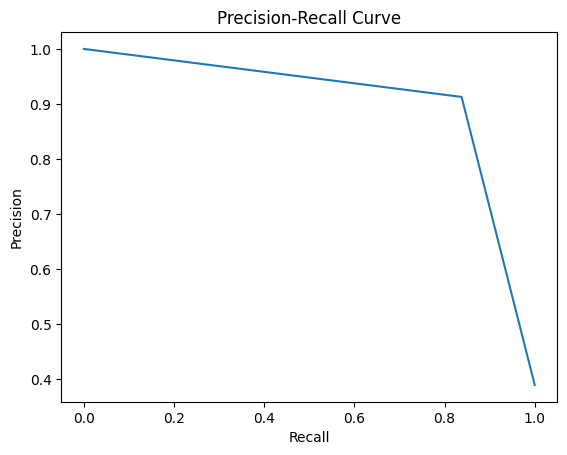

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, cb_test_prediction)

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [49]:
#from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

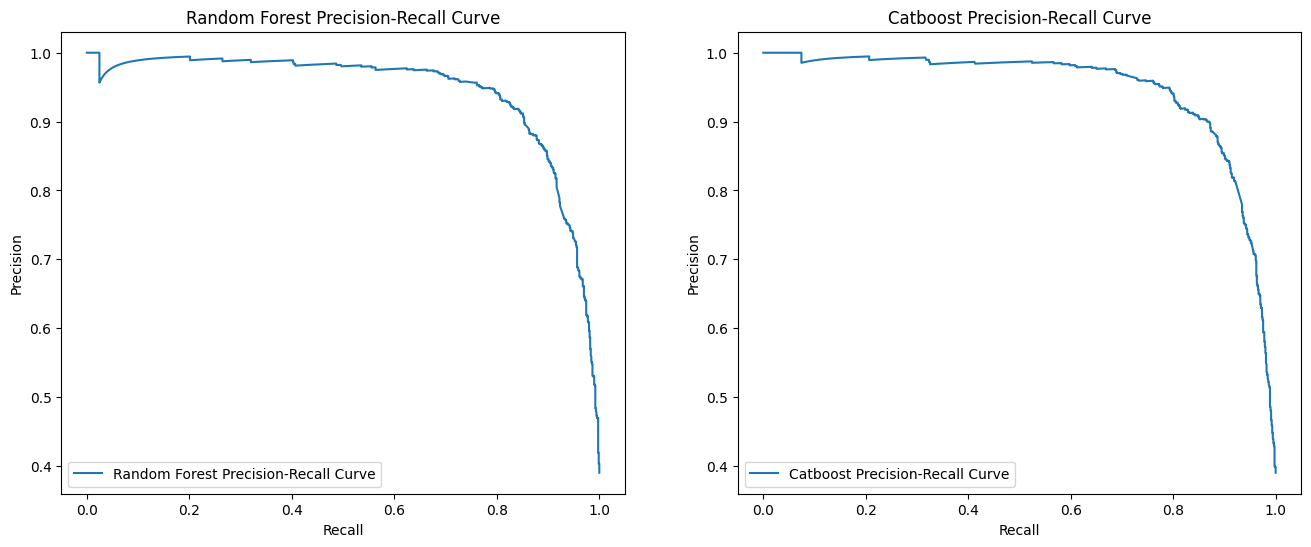

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121)

# Assuming you have a trained Random Forest classifier pipeline (rf_classif_pipeline), x_test, and y_test
y_scores_rf = rf_classif_pipeline.predict_proba(x_test)[:, 1]  # Get predicted probabilities for the positive class
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
plt.plot(recall_rf, precision_rf, label='Random Forest Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend()

ax2 = plt.subplot(122)

# Assuming you have a trained Catboost model (catboost_model), x_test, and y_test
y_scores_catboost = catboost_model.predict_proba(x_test)[:, 1]  # Get predicted probabilities for the positive class
precision_catboost, recall_catboost, _ = precision_recall_curve(y_test, y_scores_catboost)
plt.plot(recall_catboost, precision_catboost, label='Catboost Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Catboost Precision-Recall Curve')
plt.legend()

plt.show()

In [51]:
#Random Forest Algorithm

fpr, tpr, thresh = roc_curve(y_test, rf_test_prob[:, 1])
rf_auc_score = roc_auc_score(y_test, rf_test_prob[:, 1])

In [52]:
#CatBoost Algorithm
c_fpr, c_tpr, c_thresh = roc_curve(y_test, cb_test_prob[:, 1])
cb_auc_score = roc_auc_score(y_test, cb_test_prob[:, 1])

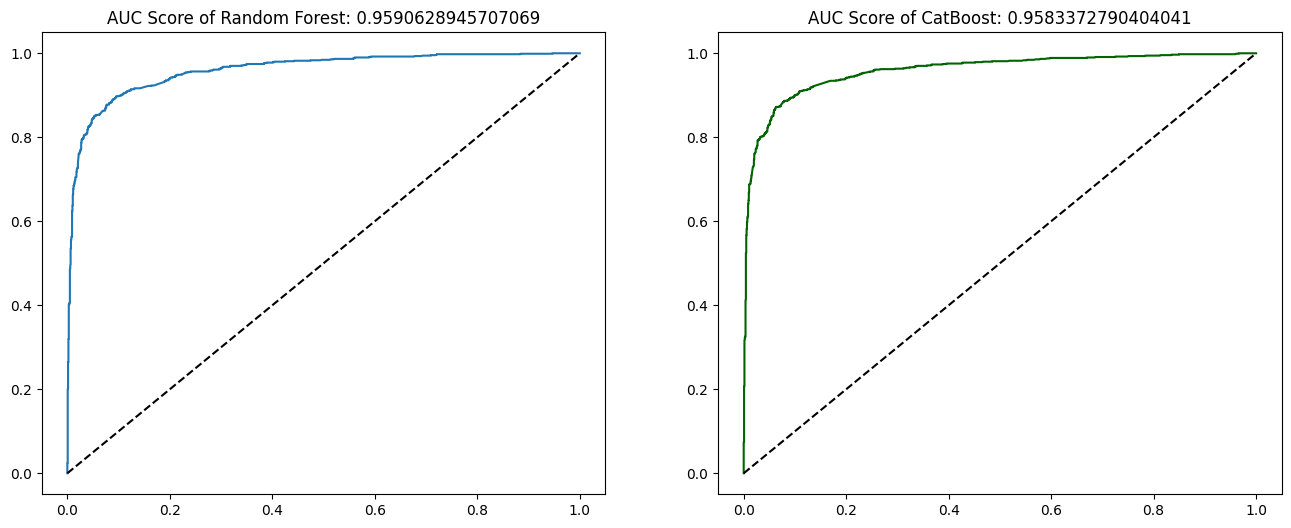

In [53]:
# Plotting ROC/AUC Curve

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(fpr, tpr)
plt.title("AUC Score of Random Forest: %s" %(rf_auc_score))
plt.plot([0,1], [0,1], color = 'k', linestyle = '--')
plt.subplot(122)
plt.plot(c_fpr, c_tpr, color = 'darkgreen')
plt.title("AUC Score of CatBoost: %s" %(cb_auc_score))
plt.plot([0,1], [0,1], color = 'k', linestyle = '--')

### Probability Calibration Plot

In [54]:
rf_y, rf_x = calibration_curve(y_test, rf_test_prob[:, 1], n_bins = 5)
cb_y, cb_x = calibration_curve(y_test, cb_test_prob[:, 1], n_bins = 5)

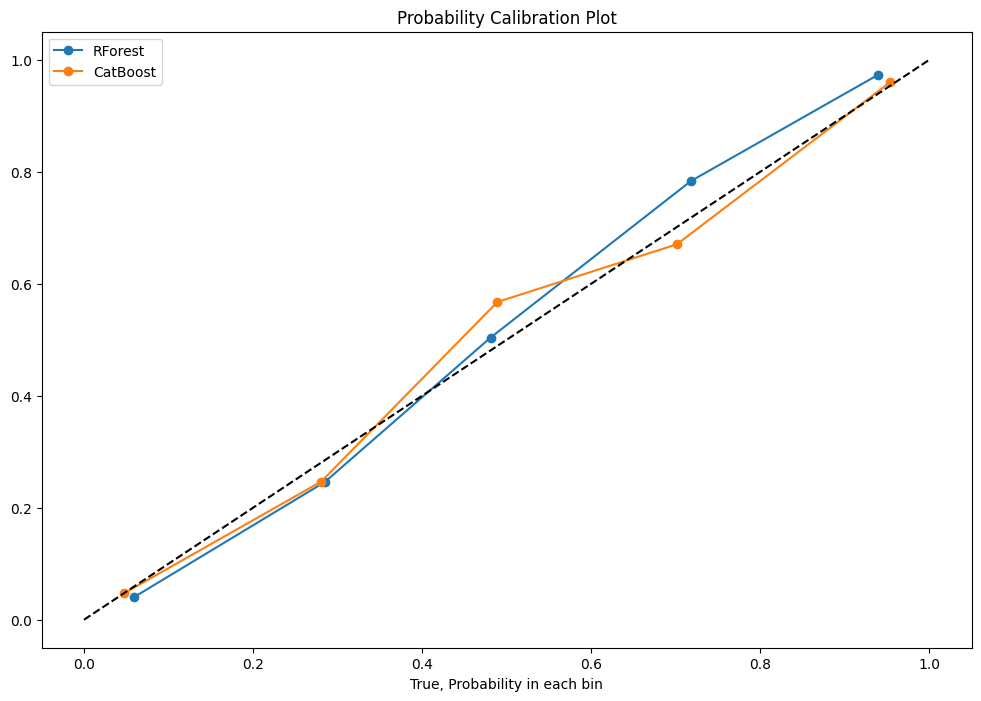

In [55]:
# Probability Calibration Plot

plt.figure(figsize=(12,8))
plt.title("Probability Calibration Plot")
plt.plot(rf_x, rf_y, marker = 'o', label = 'RForest')
plt.plot(cb_x, cb_y, marker = 'o', label = 'CatBoost')
plt.plot([0.0,1.0], [0.0,1.0], color = 'k', linestyle = '--')
plt.xlabel("Predicted Probability")
plt.xlabel("True, Probability in each bin")
plt.legend()

When we take a look at the calibration plot, we can see that from the 1st bin to 3rd bin, our Random Forest is under-predicting the probability where as the CatBoost is over-predicting it in between 3rd to 5th bin.

In [56]:
x_train_ct = ct.fit_transform(x_train)
x_test_ct = ct.fit_transform(x_test)

In [57]:
x_train_ct = pd.DataFrame(x_train_ct, columns = x_train.columns)
x_test_ct = pd.DataFrame(x_test_ct, columns = x_test.columns)

In [58]:
rf_model = RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', bootstrap = False, max_depth = None, random_state = 42)
cb_model = CatBoostClassifier(random_strength=1, learning_rate=0.5, l2_leaf_reg=7, iterations=10, depth=10, border_count=50, silent = True, eval_metric='Accuracy')

In [59]:
rf_sigmoid = CalibratedClassifierCV(base_estimator=rf_model, cv = 5)
rf_iso = CalibratedClassifierCV(base_estimator=rf_model, method = 'isotonic', cv = 5)

In [60]:
cb_sigmoid = CalibratedClassifierCV(base_estimator=cb_model, cv = 5)
cb_iso = CalibratedClassifierCV(base_estimator=cb_model, method = 'isotonic', cv = 5)

In [61]:
rf_sigmoid.fit(x_train_ct, y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=False,
                                                             max_features='auto',
                                                             min_samples_leaf=2,
                                                             min_samples_split=10,
                                                             n_estimators=300,
                                                             random_state=42),
                       cv=5)

In [62]:
rf_sigmoid_prob = rf_sigmoid.predict_proba(x_test_ct)

In [63]:
rf_iso.fit(x_train_ct, y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=False,
                                                             max_features='auto',
                                                             min_samples_leaf=2,
                                                             min_samples_split=10,
                                                             n_estimators=300,
                                                             random_state=42),
                       cv=5, method='isotonic')

In [64]:
rf_iso_prob = rf_iso.predict_proba(x_test_ct)

In [65]:
rf_y, rf_x = calibration_curve(y_test, rf_test_prob[:, 1], n_bins = 5)
rf_sm_y, rf_sm_x = calibration_curve(y_test, rf_sigmoid_prob[:, 1], n_bins = 5)
rf_iso_y, rf_iso_x = calibration_curve(y_test, rf_iso_prob[:, 1], n_bins = 5)

### Random Forest Probability Calibration Plot -  (Sigmoid/Isotonic/Uncalibrated)

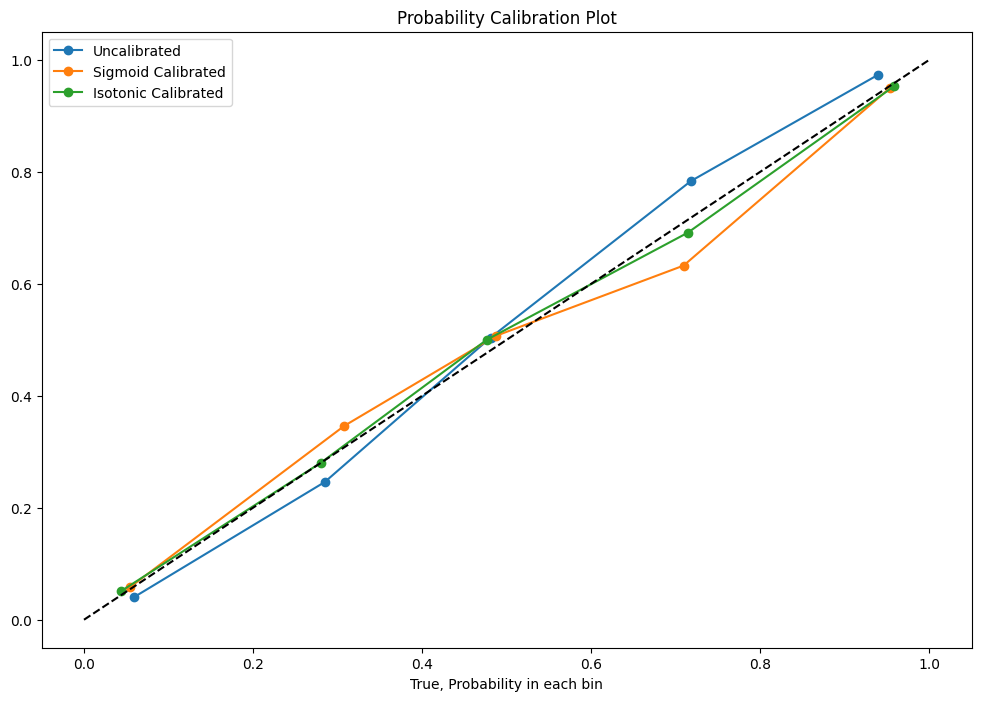

In [66]:
# Probability Calibration Plot

plt.figure(figsize=(12,8))
plt.title("Probability Calibration Plot")
plt.plot(rf_x, rf_y, marker = 'o', label = 'Uncalibrated')
plt.plot(rf_sm_x, rf_sm_y, marker = 'o', label = 'Sigmoid Calibrated')
plt.plot(rf_iso_x, rf_iso_y, marker = 'o', label = 'Isotonic Calibrated')
plt.plot([0.0,1.0], [0.0,1.0], color = 'k', linestyle = '--')
plt.xlabel("Predicted Probability")
plt.xlabel("True, Probability in each bin")
plt.legend()

In [67]:
cb_sigmoid = CalibratedClassifierCV(base_estimator=cb_model, cv = 5)
cb_iso = CalibratedClassifierCV(base_estimator=cb_model, method = 'isotonic', cv = 5)

In [68]:
cb_sigmoid.fit(x_train_ct, y_train)

CalibratedClassifierCV(base_estimator=<catboost.core.CatBoostClassifier object at 0x13981e910>,
                       cv=5)

In [69]:
cb_sigmoid_prob = cb_sigmoid.predict_proba(x_test_ct)

In [70]:
cb_iso.fit(x_train_ct, y_train)

CalibratedClassifierCV(base_estimator=<catboost.core.CatBoostClassifier object at 0x13981e910>,
                       cv=5, method='isotonic')

In [71]:
cb_iso_prob = cb_iso.predict_proba(x_test_ct)

In [72]:
cb_y, cb_x = calibration_curve(y_test, cb_test_prob[:, 1], n_bins = 5)
cb_sm_y, cb_sm_x = calibration_curve(y_test, cb_sigmoid_prob[:, 1], n_bins = 5)
cb_iso_y, cb_iso_x = calibration_curve(y_test, cb_iso_prob[:, 1], n_bins = 5)

### CatBost Probability Calibration Plot -  (Sigmoid/Isotonic/Uncalibrated)

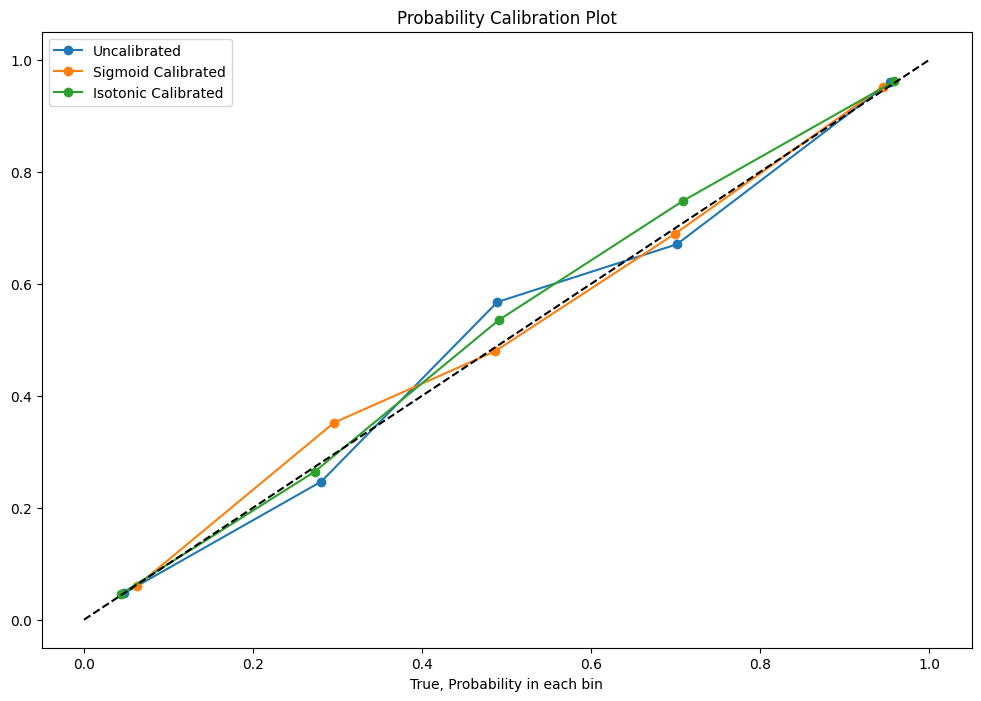

In [73]:
# Probability Calibration Plot

plt.figure(figsize=(12,8))
plt.title("Probability Calibration Plot")
plt.plot(cb_x, cb_y, marker = 'o', label = 'Uncalibrated')
plt.plot(cb_sm_x, cb_sm_y, marker = 'o', label = 'Sigmoid Calibrated')
plt.plot(cb_iso_x, cb_iso_y, marker = 'o', label = 'Isotonic Calibrated')
plt.plot([0.0,1.0], [0.0,1.0], color = 'k', linestyle = '--')
plt.xlabel("Predicted Probability")
plt.xlabel("True, Probability in each bin")
plt.legend()

As you can see how probability calibration can be helpful. You can use this probability calibration in case of Imbalance dataset as well to tweak the model performance in combination with AUC/ROC for model diagnosis.